In [1]:
import seaborn as sns 

In [2]:
import pandas as pd 

In [3]:
planets = sns.load_dataset("planets")

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


# veri setinin hikayesi nedir ? 

galakasiler hakkında bilgi sunun bir veri setidir

In [5]:
df = planets.copy()

copy() bir kopyasını oluşturudk yedek aldık

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [7]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
df.method = pd.Categorical(df.method)

In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [10]:
 df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
df.shape

(1035, 6)

In [12]:
df.describe().T # eksik gözlemleri göz arı eder ve katagorik değişkenleri dışarıda bırakır

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [13]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

sadece katorgorik değişkenler ve özetleri

In [14]:
kat_df = df.select_dtypes(include = ["category"])

In [15]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


kategporik değişkenlerin sınıflarına erişmek  ve sınıf saysısına erişmek 

In [16]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [17]:
kat_df["method"].value_counts().count()

np.int64(10)

In [18]:
kat_df["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

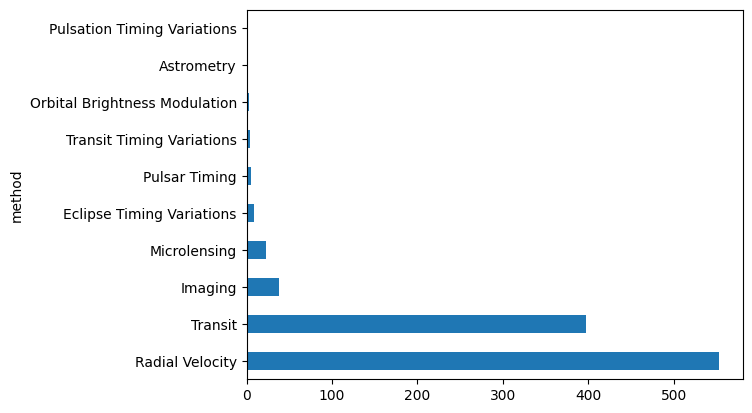

In [19]:
df["method"].value_counts().plot.barh();

In [20]:
df_num = df.select_dtypes(include=["float64","int64"])

In [21]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [22]:
df_num["distance"].describe().T


count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [23]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count()))
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404421


# veri görselleştirme

sütün grafikler katorgorik değişkenleri görselleştirmek için kullanılır

 Elmas Veri Seti Özellikleri (Veri Sözlüğü)

Bu veri seti, elmasların özelliklerini ve fiyatlarını içerir.

| Özellik | Açıklama | Değer Aralığı / Kategori |
| :--- | :--- | :--- |
| **price** | Dolar cinsinden elmasın fiyatı. | 326 – 18,823 |
| **carat** | Elmasın ağırlığı. | 0.2 – 5.01 |
| **cut** | Kesim kalitesi. | Fair, Good, Very Good, Premium, **Ideal** |
| **color** | Renk derecesi. | **D (en iyi)**'den **J (en kötü)**'ye doğru. |
| **clarity** | Berraklık/temizlik derecesi. | **IF (en iyi)**'den **I1 (en kötü)**'ye doğru (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1) |
| **x** | Uzunluk (length) | 0 – 10.74 mm |
| **y** | Genişlik (width) | 0 – 58.9 mm |
| **z** | Derinlik (depth) | 0 – 31.8 mm |
| **depth** | Toplam Derinlik Yüzdesi | $2 * z / (x + y)$ (43 – 79) |
| **table** | En geniş noktasına göre genişlik. | 43 – 95 |

In [24]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()

In [25]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [28]:
df.isnull().sum() # veri tertemiz bir veri 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [29]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [30]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

katogorik değişkenlere baktığımız zaman arlarında ilişki de nominal değil de ordinal bir ilişki var olduğunu görüyoruz 

In [31]:
from pandas.api.types import CategoricalDtype

In [32]:
df['cut'].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [33]:
df.cut =df.cut.astype(CategoricalDtype(ordered=True))

In [34]:
df['cut'].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

ordinal halien getirdik ama sıralamyı pc kendisi yanlış yaptı

In [35]:
cut_sıralama = ["Fair","Good","Very Good","Premium","Ideal"]

In [36]:
df.cut =df.cut.astype(CategoricalDtype(categories=cut_sıralama ,ordered=True))


In [37]:
df['cut'].head()


0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

bu sefer biizim verdiğimiz kendi listeye göre bir sıralama işlemi yapmış oldu 

# Barplot

<Axes: ylabel='cut'>

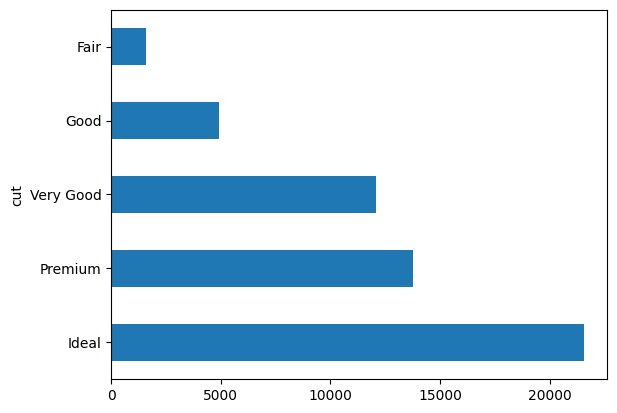

In [38]:
df['cut'].value_counts().plot.barh()

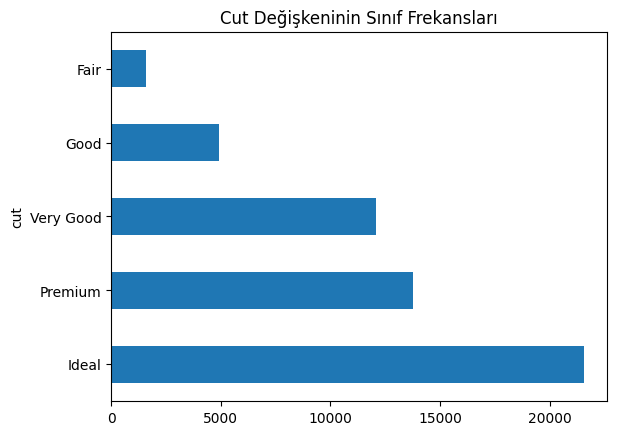

In [39]:
df['cut'].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

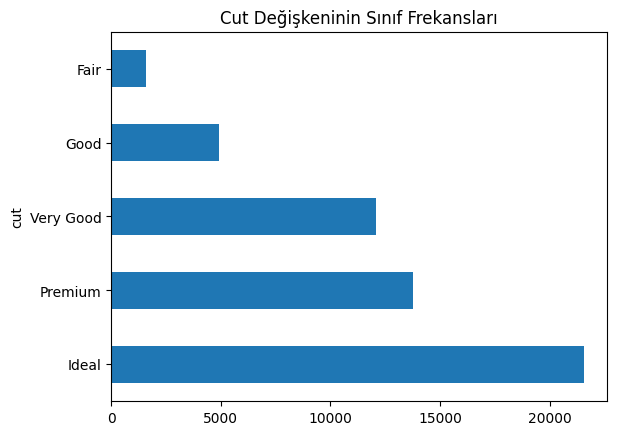

In [40]:
(df['cut'].value_counts()
    .plot.barh().
    set_title("Cut Değişkeninin Sınıf Frekansları"));

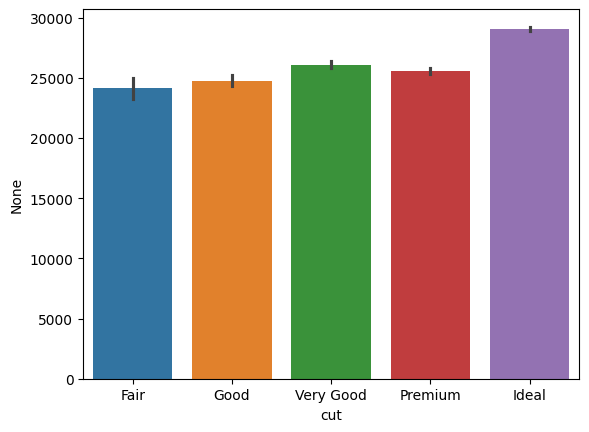

In [41]:
sns.barplot(x = "cut",y = df.cut.index, hue="cut", data=df);

<Axes: xlabel='count', ylabel='cut'>

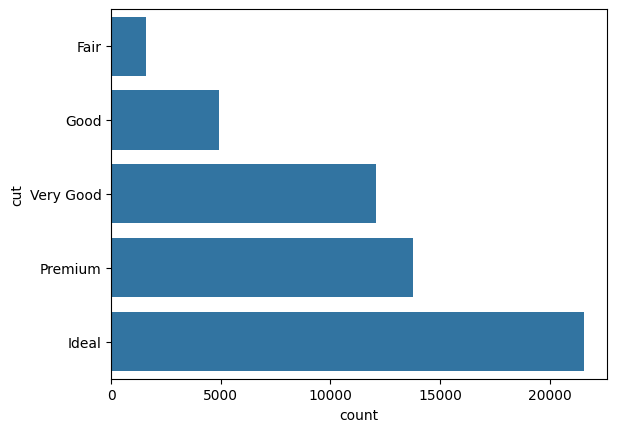

In [42]:
sns.countplot(y="cut", data=df)

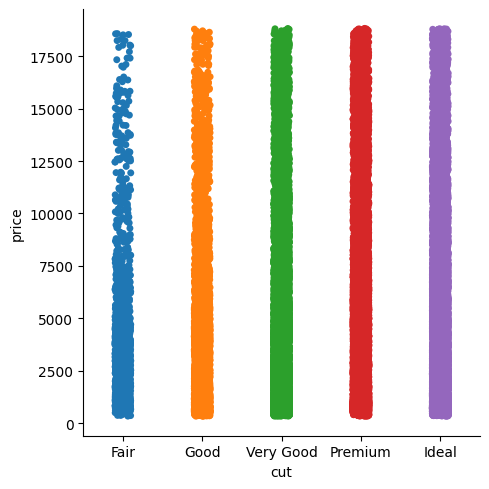

In [43]:
sns.catplot(x = "cut",y = "price",data = df,hue="cut"); # hue renk verdi

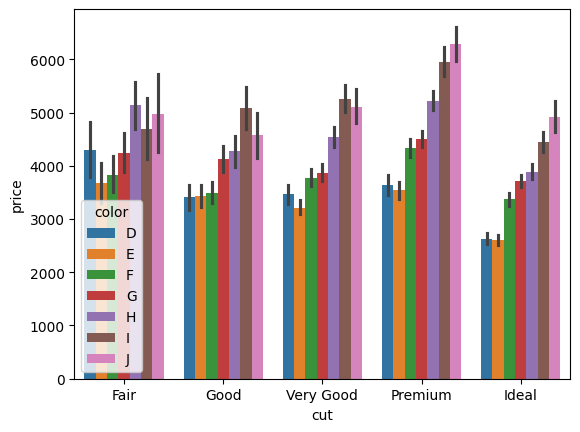

In [44]:
sns.barplot(x = "cut",y ="price",hue="color",data=df);

yukarıda ki grafikte toplamda 3 tane değiken gözlem bulunkata bunlar price cut ve color. cut ve color beraber price değişkeninin değerin hesaplanmasında kullanılıyor olmalı ki her birisi değiştiğinde farklı fiyatlar söz konusu oluyor

In [45]:
df.groupby(["cut","color"])["price"].mean().unstack()

C:\Users\05hde\AppData\Local\Temp\ipykernel_12512\663442698.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean().unstack()


color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384


y ekseni aslında bozulmuş gibi dursa da aslında meane göre listelenmiş bulunuyor.

In [46]:
df.groupby(["cut","color"])["price"].std().unstack()

C:\Users\05hde\AppData\Local\Temp\ipykernel_12512\848479075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].std().unstack()


color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,3286.114238,2976.651645,3223.302685,3609.644379,3886.481847,3730.271132,4050.458933
Good,3175.148710,3330.702061,3202.411187,3702.504718,4020.660488,4631.702141,3707.790845
Very Good,3523.753268,3408.023634,3786.124033,3861.375464,4185.798202,4687.104775,4135.652742
Premium,3711.634010,3794.987184,4012.022756,4356.571034,4466.189717,5053.746146,4788.936691
Ideal,3001.069919,2956.007149,3766.635328,4006.262468,4013.375228,4505.150405,4476.206836


Aryıca sutunlar uzerinde bulunan cubuklar da bir anlam ifade etmektedir o da sudur ki bu cubuklar uzun use varyansı ve standart satpması buyuktur anlamına gelir bu da mean değerine olan guveni düşürür eğer ki kısa ise varyans ve standrt sapma küçük demek olur bu da mean değerine olan güveni arttırır

## Histogram ve Yoğunluk Grafikleri

# Seaborn `sns.displot()` Fonksiyonu Parametre Açıklamaları

Aşağıda `sns.displot()` fonksiyonundaki tüm önemli parametrelerin sade ve anlaşılır açıklamaları bulunmaktadır.

---

## **data**
Kullanılacak veri setidir.  
Genellikle bir `DataFrame` olur.  
Örnek: `data=df`

---

## **x**
Histogramda veya KDE'de x eksenine yerleştirilecek değişken.  
Örnek: `x="price"`

---

## **y**
Y eksenine yerleştirilecek değişken.  
Genellikle histogram değil, KDE veya joint dağılımlarda kullanılır.

---

## **hue**
Renk grubunu belirler.  
Kategorik bir değişken verildiğinde her kategori farklı renkte çizilir.  
Örnek: `hue="cut"`

---

## **row**
Facet plot oluşturur.  
Her kategori için ayrı bir satırda grafik üretir.  
Örnek: `row="cut"`

---

## **col**
Facet plot oluşturur.  
Her kategori için ayrı bir sütunda grafik üretir.  
Örnek: `col="color"`

---

## **weights**
Her gözleme bir ağırlık verir.  
Histogram çubuklarının yüksekliklerini ayarlamak için kullanılır.  
Örnek: `weights=df["some_weight_column"]`

---

## **kind**
Grafik türünü belirler:  
- `"hist"` → Histogram  
- `"kde"` → Yoğunluk eğrisi  
- `"ecdf"` → Birikimli dağılım fonksiyonu  
Varsayılan: `"hist"`

---

## **rug**
Her veri noktası için küçük çizgiler ekler.  
Dağılımın tam konumunu gösterir.  
Varsayılan: `False`

---

## **rug_kws**
`rugplot` için stil ayarları eklemek için kullanılır.  
Örnek: `rug_kws={"height":0.1, "color":"red"}`

---

## **log_scale**
Eksenleri logaritmik ölçekle gösterir.  
Örnek:  
- `log_scale=True` → her iki eksen log  
- `log_scale=(True, False)` → sadece x log  
Fiyat, gelir gibi çarpık verilerde çok kullanışlıdır.

---

## **legend**
Renk efsanesinin (legend) görünmesini sağlar.  
Varsayılan: `True`

---

## **palette**
Renk paletini belirler.  
Örnek: `palette="viridis"` veya `palette=["red","blue"]`

---

## **hue_order**
Hue kategorilerinin sıralamasını belirler.  
Örnek: `hue_order=["Fair","Good","Very Good","Premium","Ideal"]`

---

## **hue_norm**
Hue değerlerinin normalize edilmesinde kullanılır.  
Genelde sayısal hue kullanımında önemlidir.

---

## **color**
Tek renk belirtmek için kullanılır.  
Örnek: `color="purple"`

---

## **col_wrap**
Facet plot'ta sütunlar çoksa belirli bir sayıda sarma (wrap) yapılmasını sağlar.  
Örnek: `col_wrap=3` → her 3 grafikten sonra yeni satıra geçer.

---

## **row_order**
Row facet'leri sıralamak için kullanılır.

---

## **col_order**
Col facet'leri sıralamak için kullanılır.

---

## **height**
Oluşturulan her grafiğin yüksekliğini belirler.  
Varsayılan: `5`

---

## **aspect**
En-boy oranıdır.  
`aspect=1` → kare grafik  
`aspect=1.5` → geniş grafik

---

## **facet_kws**
FacetGrid için ek ayarlar geçmekte kullanılır.  
Örnek:  
`facet_kws={"sharex": False}`

---

## **\*\*kwargs**
Seaborn’un alt fonksiyonlarına (histplot, kdeplot vb.) gönderilecek ek parametrelerdir.  
Örnek:  
`bins=30`, `element="step"`, `alpha=0.6`

---

#  Özet
`sns.displot()` veri dağılımını histogram, kde, ecdf gibi çeşitli grafiklerle çok yönlü şekilde görselleştirmeye yarayan bir üst düzey fonksiyondur. Facet yapısı ile aynı anda birden fazla grafiği otomatik olarak oluşturabilir.



aşağıda ki kod düşükten yükseğe doru giden fiyatların saysınını verir bize gragğe bakıldığında düşük fiyatlar daha fazladır 

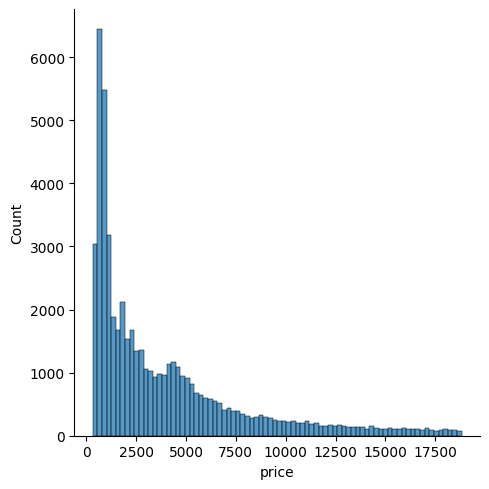

In [47]:
sns.displot(df.price , kde=False) #yoğunluk kde 

In [48]:
#Histogram, sayısal (numerik) bir değişkenin değerlerinin hangi aralıklarda yoğunlaştığını gösteren bir grafiktir. 

In [49]:
?sns.displot

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

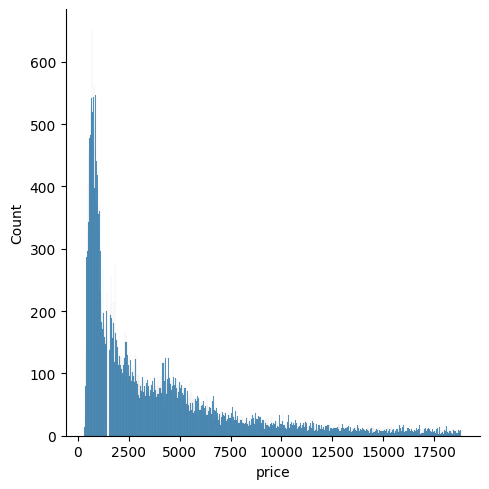

In [50]:
sns.displot(df.price ,bins=1000, kde=False) 

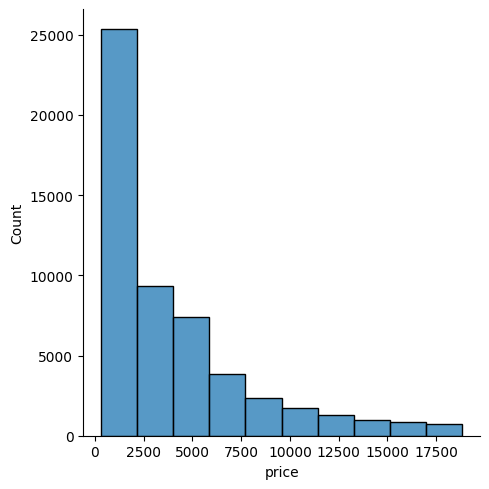

In [51]:
sns.displot(df.price ,bins=10, kde=False) 

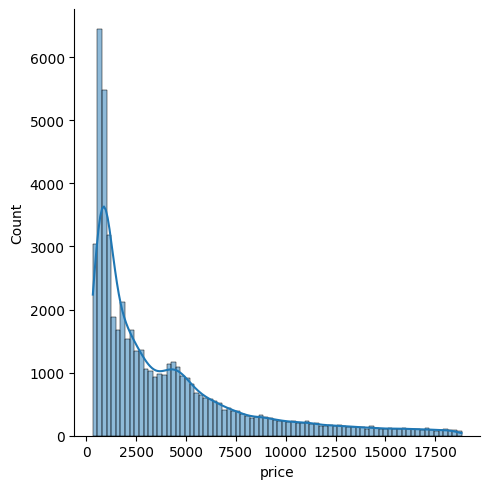

In [52]:
sns.displot(df.price ,kde = True) ;

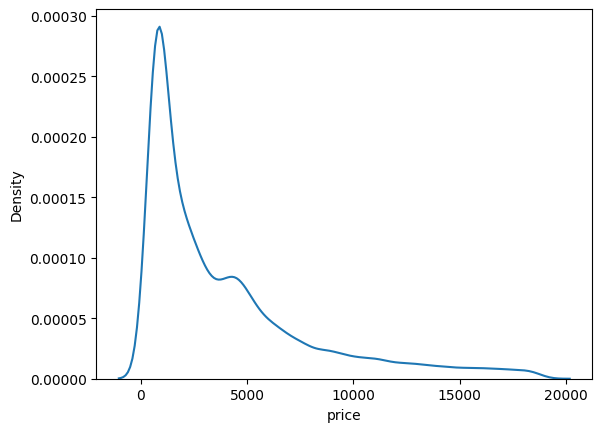

In [53]:
sns.kdeplot(df["price"], fill=False);

C:\Users\05hde\AppData\Local\Temp\ipykernel_12512\1413907769.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["price"],shade=True,fill=False)


<Axes: xlabel='price', ylabel='Density'>

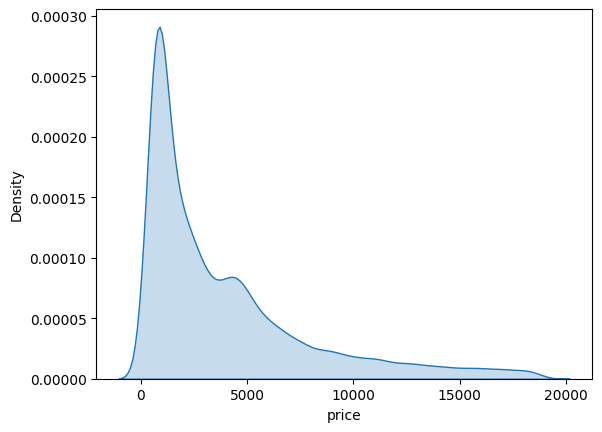

In [54]:
sns.kdeplot(df["price"],shade=True,fill=False)

C:\Users\05hde\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\05hde\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\05hde\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\05hde\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprec

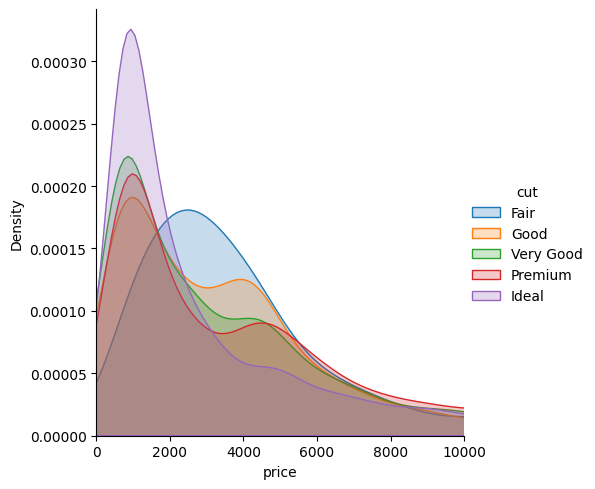

In [55]:
(sns
    .FacetGrid(df,
              hue="cut",
              height=5,
              xlim=(0,10000),)
.map(sns.kdeplot, "price",shade=True)
.add_legend()
);

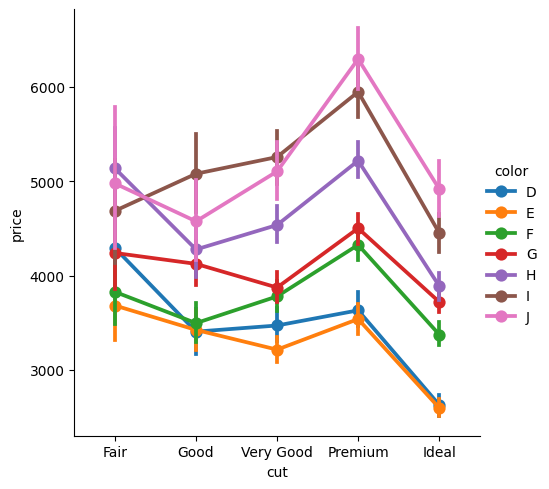

In [56]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

## Kutu Grafiği Box Plot

In [57]:
tips = sns.load_dataset("tips")

In [58]:
df = tips.copy()

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Seaborn "tips" Veri Seti – Değişken Açıklamaları

Seaborn'ın `tips` veri seti restoran bahşiş davranışlarını içerir.  
Aşağıda veri setindeki tüm değişkenler **madde madde (–)** açıklanmıştır.

---

## – **total_bill**
- Masanın toplam hesap tutarıdır.
- Sayısal (float) bir değişkendir.
- Birim: USD dolar.
- Bahşiş miktarıyla güçlü ilişkiye sahiptir.

---

## – **tip**
- Ödenen bahşiş miktarıdır.
- Sayısal (float) değişkendir.
- Birim: USD dolar.
- Genellikle `total_bill` arttıkça artar.

---

## – **sex**
- Hesabı ödeyen kişinin cinsiyeti.
- Kategorik (string) bir değişken.
- Değerler:
  - `"Male"`
  - `"Female"`

---

## – **smoker**
- Masada sigara içilip içilmediği.
- Kategorik (string).
- Değerler:
  - `"Yes"`
  - `"No"`

---

## – **day**
- Hesabın ödendiği gün.
- Kategorik (string).
- Değerler genelde:
  - `"Thur"` (Perşembe)
  - `"Fri"` (Cuma)
  - `"Sat"` (Cumartesi)
  - `"Sun"` (Pazar)
- Hafta sonu–hafta içi karşılaştırmaları için önemlidir.

---

## – **time**
- Yemeğin türü (gün içi mi akşam mı?).
- Kategorik (string).
- Değerler:
  - `"Lunch"`
  - `"Dinner"`

---

## – **size**
- Masadaki toplam kişi sayısıdır.
- Sayısal (integer).
- Grup büyüklüğünün hesap ve bahşiş üzerindeki etkisini anlamak için kullanılır.

---

# Özet
`tips` veri seti restoran müşterilerinin hesap, bahşiş, sigara, gün, yemek zamanı ve masa büyüklüğü gibi değişkenlerini içerir.  
Bahşiş analizleri, regresyon, kategorik analizler ve görselleştirme için ideal bir veri setidir.



In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [61]:
df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [62]:
df["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [63]:
df["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [64]:
df["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

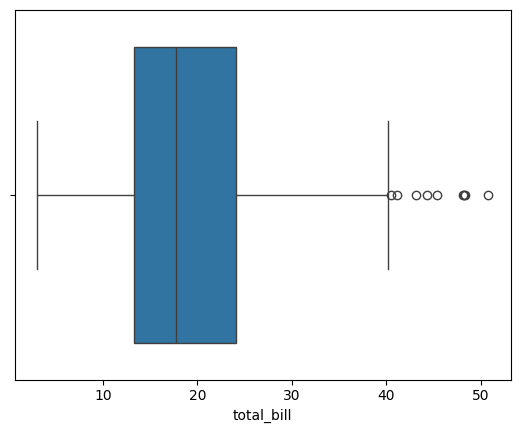

In [65]:
sns.boxplot(x = df["total_bill"]);

In [66]:
# hangi gunler daha fazla kaazanıyoruz 

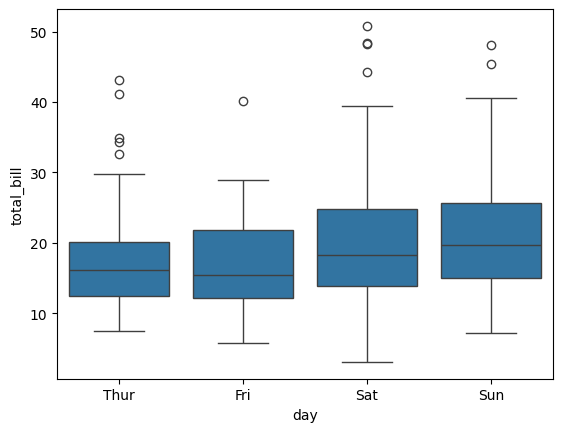

In [67]:
sns.boxplot(x = "day",y=("total_bill"),data=df);

In [68]:
#sabah mı akşam mı daha fazla kazanıyoruz

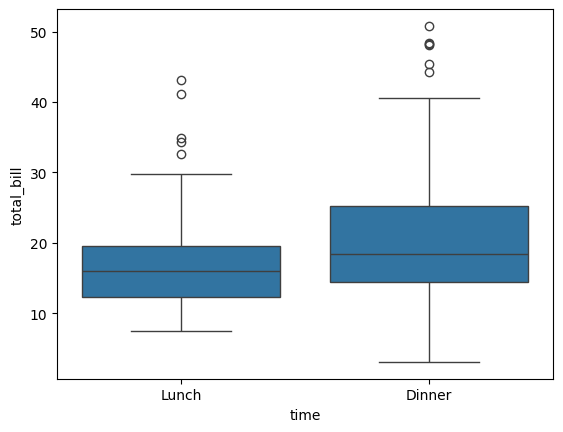

In [69]:
sns.boxplot(x = "time",y=("total_bill"),data=df);

In [70]:
#kisi sayısı kazanc

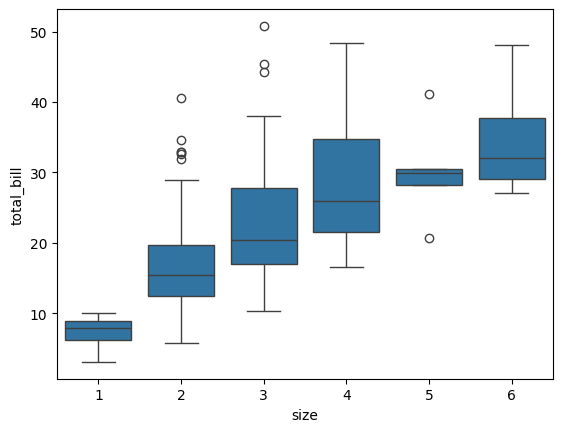

In [71]:
sns.boxplot(x = "size",y=("total_bill"),data=df);

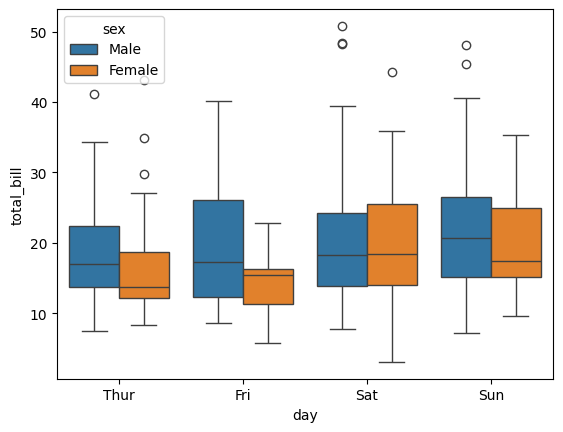

In [72]:
sns.boxplot(x = "day",y=("total_bill"), hue =("sex"), data=df);


## Violin grafiği

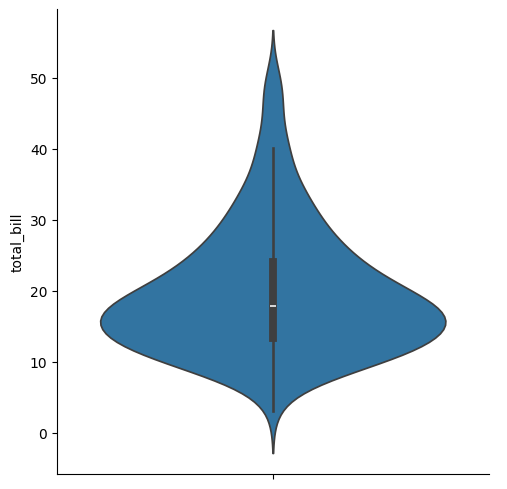

In [73]:
sns.catplot(y="total_bill",kind="violin",data=df)

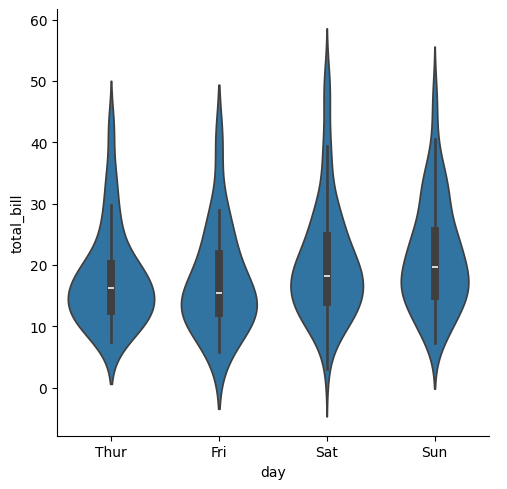

In [74]:
sns.catplot(x ="day",y="total_bill",kind="violin",data=df)

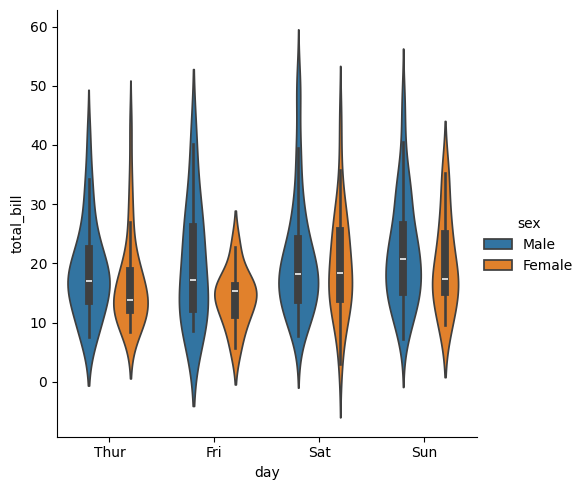

In [75]:
sns.catplot(x ="day",y="total_bill", hue="sex",kind="violin",data=df)


## Korelasyo Grafiği

<Axes: xlabel='total_bill', ylabel='tip'>

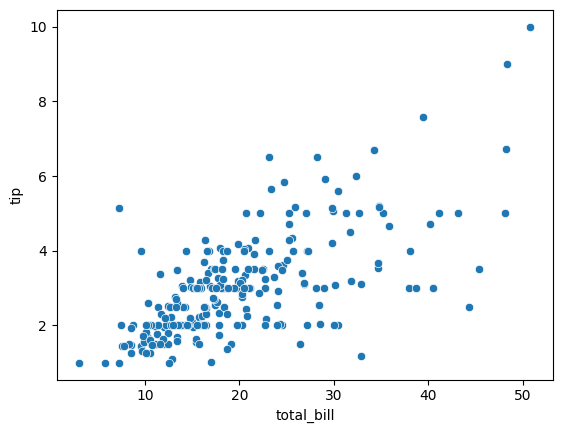

In [76]:
sns.scatterplot(x="total_bill",y="tip",data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

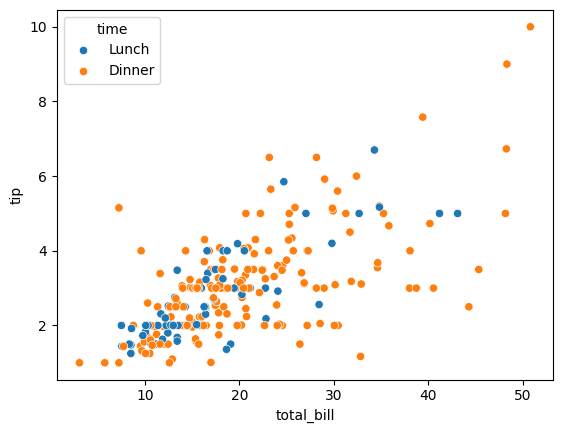

In [77]:
sns.scatterplot(hue="time",x="total_bill",y="tip",data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

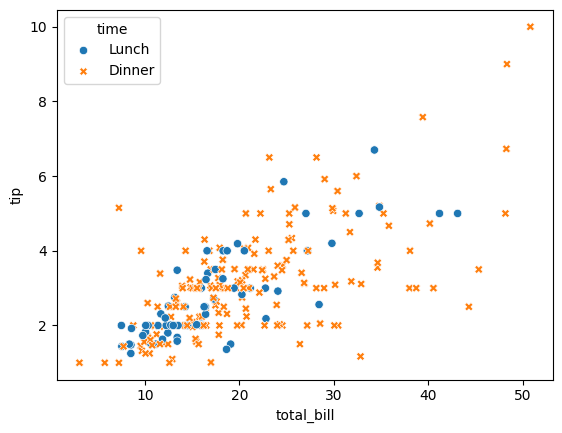

In [78]:
sns.scatterplot(style="time",hue="time",x="total_bill",y="tip",data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

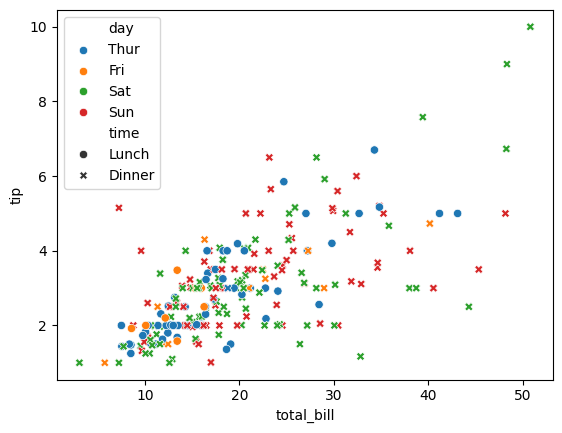

In [79]:
sns.scatterplot(style="time",hue="day",x="total_bill",y="tip",data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

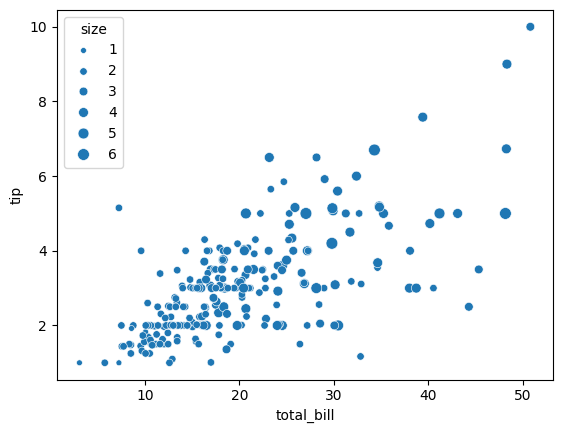

In [80]:
sns.scatterplot(x="total_bill",y="tip",size = "size",data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

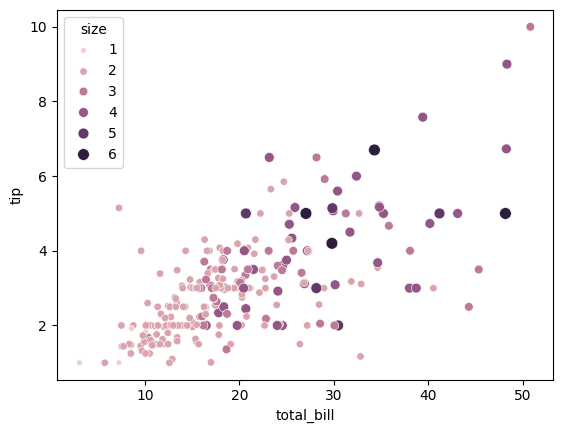

In [81]:
sns.scatterplot(x="total_bill",y="tip",size = "size",data=df,hue="size")

In [82]:
import matplotlib.pyplot as plt

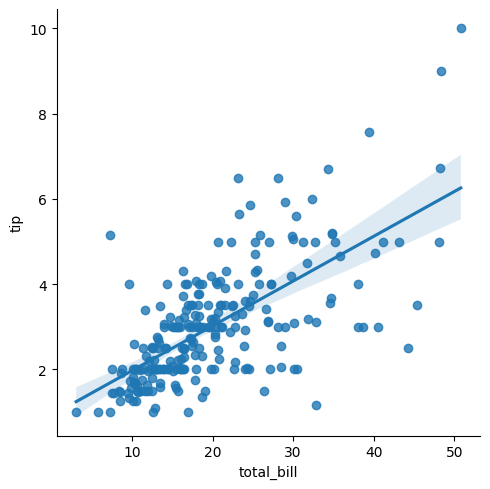

In [83]:
sns.lmplot(x = "total_bill",y="tip",data=df)

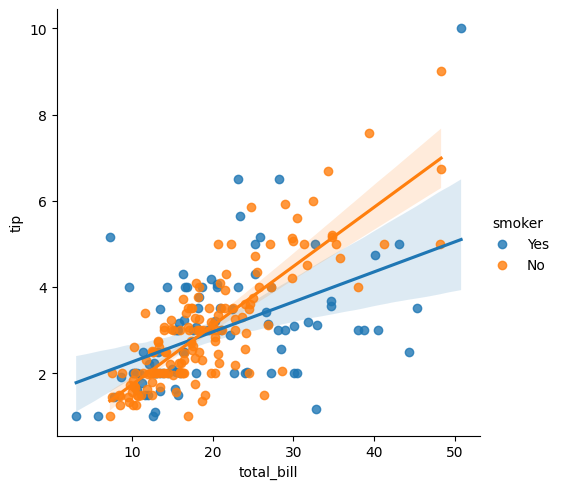

In [84]:
sns.lmplot(x = "total_bill",y="tip",hue="smoker",data=df);

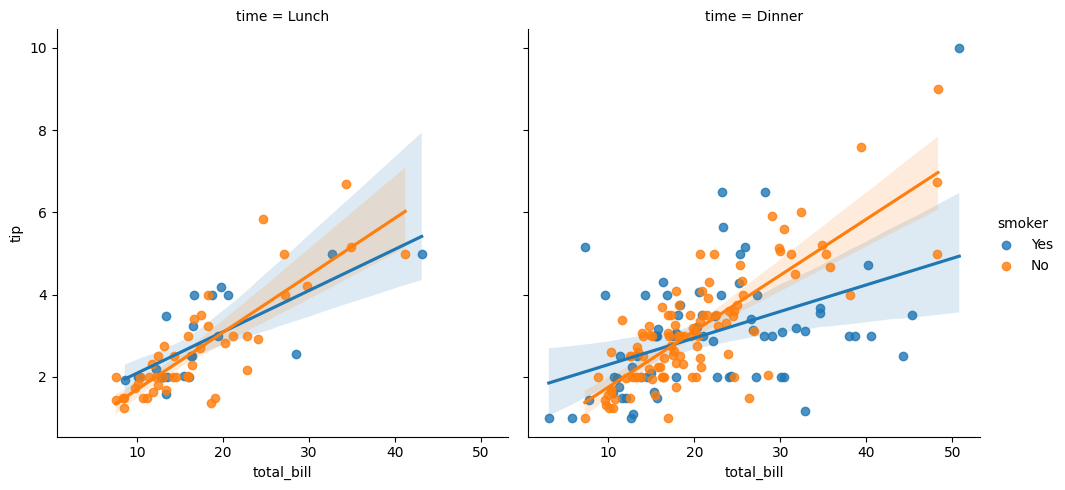

In [85]:
sns.lmplot(x = "total_bill",y="tip",hue="smoker",col="time",data=df);

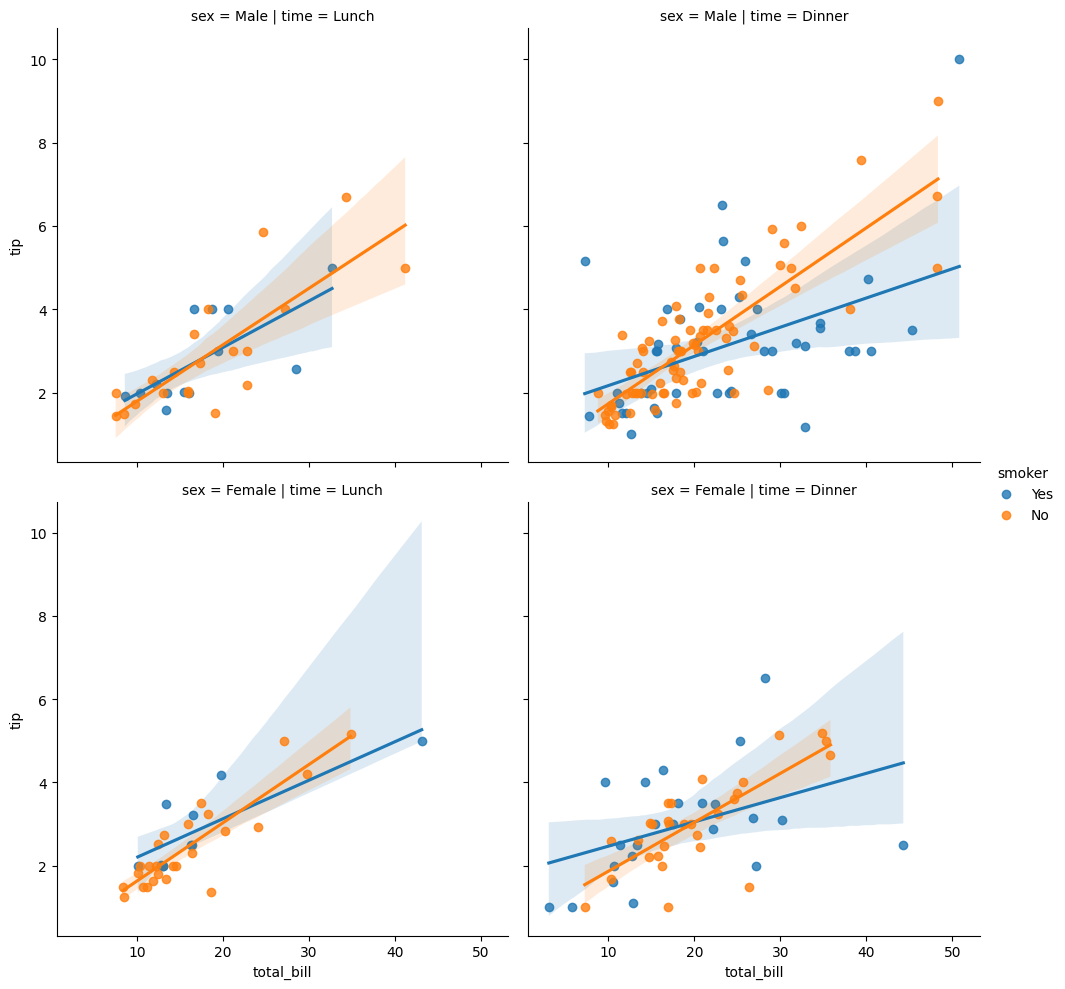

In [86]:
sns.lmplot(x = "total_bill",y="tip",hue="smoker",col="time",row="sex",data=df);

## HeatMap

In [87]:
flights = sns.load_dataset("flights")

In [88]:
df = flights.copy()

In [89]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [91]:
df.shape

(144, 3)

In [92]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [98]:
df = df.pivot(index="month", columns="year", values="passengers")

In [100]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

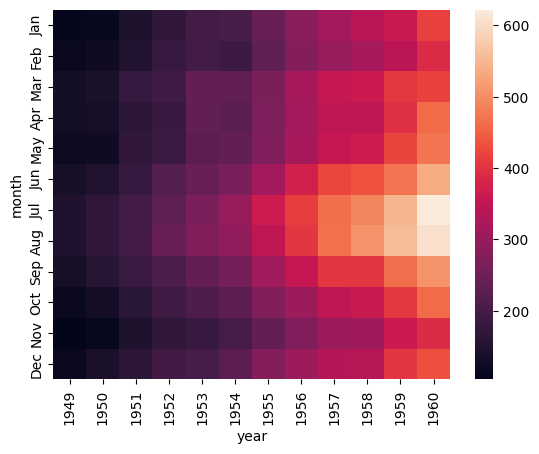

In [101]:
sns.heatmap(df)

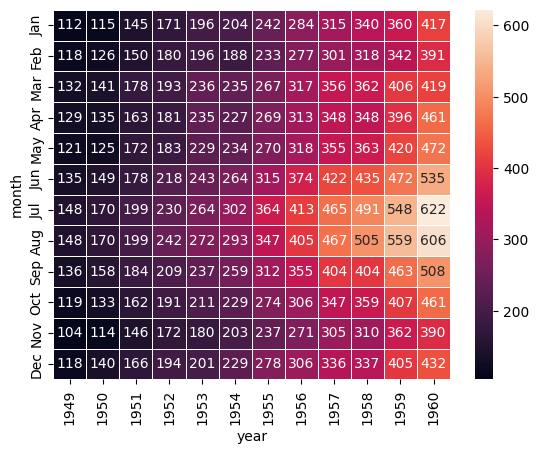

In [103]:
sns.heatmap(df,annot=True,fmt = "d",linewidths=.5);

## Çizgi Grafiği 

In [106]:
fmri = sns.load_dataset("fmri")

In [107]:
df = fmri.copy()

In [108]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [110]:
df.shape

(1064, 5)

In [111]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [112]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [116]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [118]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [119]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


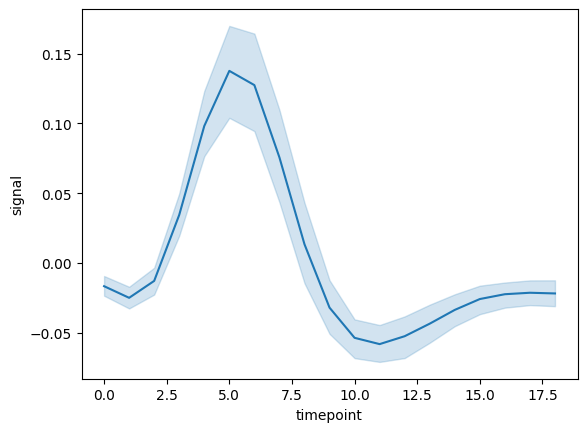

In [121]:
sns.lineplot(x = "timepoint",y="signal",data = df);

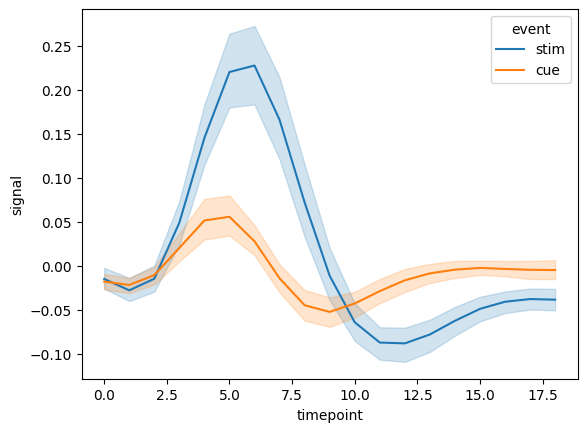

In [122]:
sns.lineplot(x = "timepoint",y="signal",hue="event",data = df);